# llm_perf dataset

In [20]:
import pandas as pd

df = pd.read_csv('data/aggregated_llm_perf.csv')

In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944 entries, 0 to 1943
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   model             1944 non-null   object 
 1   throughput        1944 non-null   float64
 2   response_length   1944 non-null   int64  
 3   latency           1944 non-null   float64
 4   energy            1944 non-null   float64
 5   gpu               1944 non-null   object 
 6   task              1944 non-null   object 
 7   parameters_count  1944 non-null   float64
 8   energy_per_token  1944 non-null   float64
 9   dtype             1944 non-null   object 
 10  optimization      408 non-null    object 
 11  quantization      1180 non-null   object 
 12  cuda-fp16         1944 non-null   bool   
dtypes: bool(1), float64(5), int64(1), object(6)
memory usage: 184.3+ KB
None


In [22]:
print(df.describe())

        throughput  response_length      latency        energy  \
count  1944.000000           1944.0  1944.000000   1944.000000   
mean     67.711569            256.0     8.396854   2276.563058   
std      73.213402              0.0     8.606695   2298.845976   
min       3.380000            256.0     0.394000     57.231360   
25%      26.700000            256.0     3.330000    836.812800   
50%      40.750000            256.0     6.285000   1700.352000   
75%      76.900000            256.0     9.600000   2803.968000   
max     650.000000            256.0    75.700000  20459.520000   

       parameters_count  energy_per_token  
count       1944.000000       1944.000000  
mean           6.121422          0.002470  
std            9.428142          0.002494  
min            0.001000          0.000062  
25%            0.410000          0.000908  
50%            3.000000          0.001845  
75%            7.000000          0.003043  
max           70.000000          0.022200  


In [25]:
from IPython.display import display
display(df)

,model,throughput,response_length,latency,energy,gpu,task,parameters_count,energy_per_token,dtype,optimization,quantization,cuda-fp16
0,EleutherAI/gpt-neox-20b,27.4,256,9.34,3013.6320,NVIDIA A100-SXM4-80GB,chat,20.00,0.003270,float16,NaN,gptq-4bit+exllama-v1,False
1,EleutherAI/pythia-6.9b-deduped,42.3,256,6.05,1649.6640,NVIDIA A100-SXM4-80GB,chat,6.90,0.001790,float16,NaN,gptq-4bit+exllama-v1,False
2,EleutherAI/pythia-6.7b,39.9,256,6.41,1686.5280,NVIDIA A100-SXM4-80GB,chat,6.70,0.001830,float16,NaN,gptq-4bit+exllama-v1,False
3,EleutherAI/pythia-1.4b-deduped,54.8,256,4.67,1115.1360,NVIDIA A100-SXM4-80GB,chat,1.40,0.001210,float16,NaN,gptq-4bit+exllama-v1,False
4,EleutherAI/gpt-j-6b,30.8,256,8.31,2119.6800,NVIDIA A100-SXM4-80GB,chat,6.00,0.002300,float16,NaN,gptq-4bit+exllama-v1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939,ai-forever/mGPT,98.8,256,2.59,684.7488,NVIDIA GeForce RTX 4090,chat,1.30,0.000743,float32,NaN,NaN,False
1940,bigscience/bloom-3b,65.3,256,3.92,1041.4080,NVIDIA GeForce RTX 4090,chat,3.00,0.001130,float32,NaN,NaN,False
1941,togethercomputer/RedPajama-INCITE-Base-3B-v1,60.4,256,4.24,1041.4080,NVIDIA GeForce RTX 4090,chat,3.00,0.001130,float32,NaN,NaN,False
1942,ahxt/LiteLlama-460M-1T,127.0,256,2.01,321.6384,NVIDIA GeForce RTX 4090,chat,0.46,0.000349,float32,NaN,NaN,False


# Analyse de parameters_count 

In [5]:
parameters_count_column = df['parameters_count']

entity_counts = parameters_count_column.value_counts()

print("Nombre total d'entités uniques :", len(entity_counts))
print("\nNombre de chaque entité :")
print(entity_counts)

Nombre total d'entités uniques : 72

Nombre de chaque entité :
parameters_count
7.000     347
3.000     122
1.300     101
13.000    100
0.031      96
         ... 
1.610       7
0.430       6
0.169       6
70.000      5
2.780       4
Name: count, Length: 72, dtype: int64


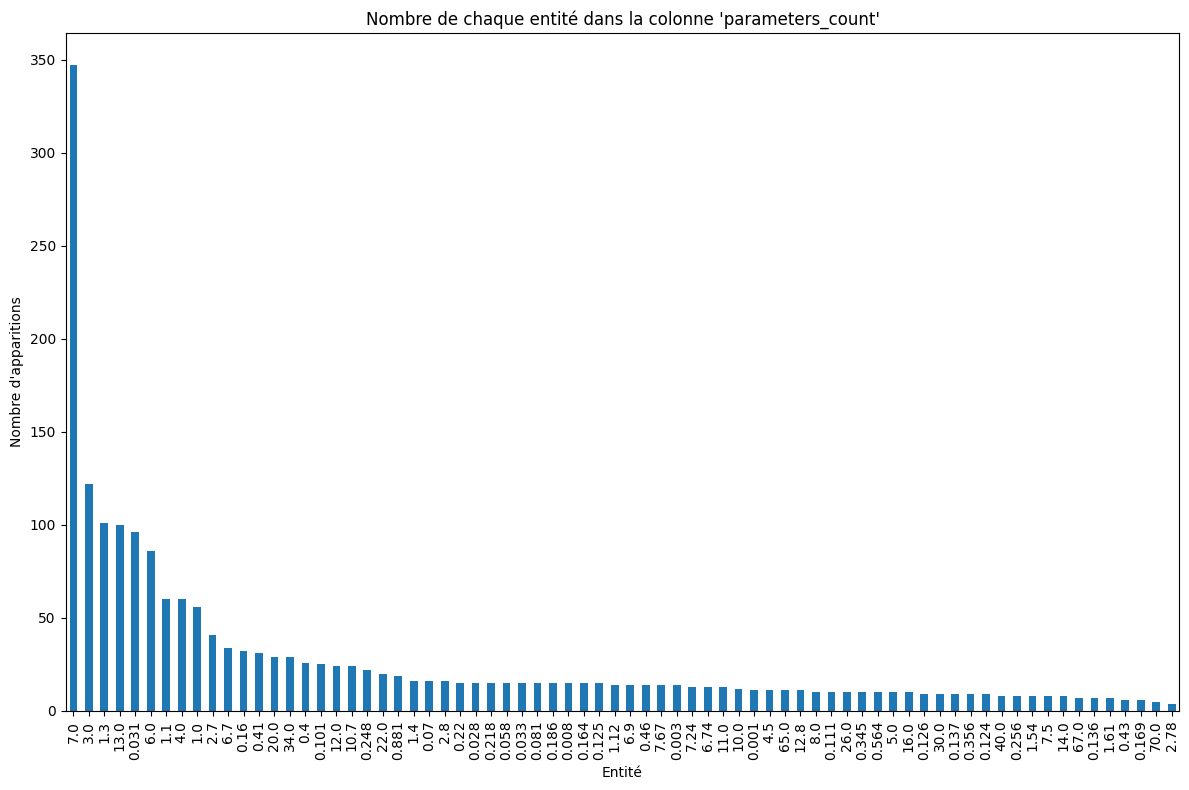

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

entity_counts.plot(kind='bar')

plt.title("Nombre de chaque entité dans la colonne 'parameters_count'")
plt.xlabel('Entité')
plt.ylabel('Nombre d\'apparitions')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Analyse de llm perf

In [12]:
import pandas as pd

nature_colonnes = df.dtypes

print(nature_colonnes)

model                object
throughput          float64
response_length       int64
latency             float64
energy              float64
gpu                  object
task                 object
parameters_count    float64
energy_per_token    float64
dtype                object
optimization         object
quantization         object
cuda-fp16              bool
dtype: object


In [26]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

le = LabelEncoder()
for col in df_encoded.select_dtypes(include=['object']):
    df_encoded[col] = le.fit_transform(df_encoded[col])
    print(f"Encodage pour la colonne {col}:")
    for label, encoded_value in zip(le.classes_, le.transform(le.classes_)):
        print(f"{label} : {encoded_value}")

df_encoded['cuda-fp16'] = df_encoded['cuda-fp16'].astype(int)


Encodage pour la colonne model:
01-ai/Yi-34B : 0
01-ai/Yi-34B-200K : 1
01-ai/Yi-6B : 2
01-ai/Yi-6B-200K : 3
AI-Sweden-Models/gpt-sw3-1.3b : 4
AI-Sweden-Models/gpt-sw3-126m : 5
AI-Sweden-Models/gpt-sw3-20b : 6
AI-Sweden-Models/gpt-sw3-356m : 7
AI-Sweden-Models/gpt-sw3-40b : 8
AI-Sweden-Models/gpt-sw3-6.7b : 9
AI-Sweden-Models/gpt-sw3-6.7b-v2 : 10
BEE-spoke-data/Mixtral-GQA-400m-v2 : 11
BEE-spoke-data/NanoLlama-GQA-L10-A32_KV8-v13-KI : 12
BEE-spoke-data/smol_llama-101M-GQA : 13
BEE-spoke-data/smol_llama-220M-GQA : 14
BEE-spoke-data/smol_llama-81M-tied : 15
BEE-spoke-data/verysmol_llama-v11-KIx2 : 16
Dampish/StellarX-4B-V0 : 17
Dampish/StellarX-4B-V0.2 : 18
Dans-DiscountModels/ShearedLlama-1.3b-FFT-Test1 : 19
Deci/DeciLM-7B : 20
Delcos/Starling-LM-11B-alpha : 21
DevaMalla/llama-base-7b : 22
Devio/test-22B : 23
EleutherAI/gpt-j-6b : 24
EleutherAI/gpt-neo-1.3B : 25
EleutherAI/gpt-neo-125m : 26
EleutherAI/gpt-neo-2.7B : 27
EleutherAI/gpt-neox-20b : 28
EleutherAI/polyglot-ko-12.8b : 29
Eleuth

In [27]:
display(df_encoded)

,model,throughput,response_length,latency,energy,gpu,task,parameters_count,energy_per_token,dtype,optimization,quantization,cuda-fp16
0,28,27.4,256,9.34,3013.6320,0,0,20.00,0.003270,1,2,5,0
1,42,42.3,256,6.05,1649.6640,0,0,6.90,0.001790,1,2,5,0
2,41,39.9,256,6.41,1686.5280,0,0,6.70,0.001830,1,2,5,0
3,31,54.8,256,4.67,1115.1360,0,0,1.40,0.001210,1,2,5,0
4,24,30.8,256,8.31,2119.6800,0,0,6.00,0.002300,1,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939,83,98.8,256,2.59,684.7488,1,0,1.30,0.000743,2,2,7,0
1940,89,65.3,256,3.92,1041.4080,1,0,3.00,0.001130,2,2,7,0
1941,175,60.4,256,4.24,1041.4080,1,0,3.00,0.001130,2,2,7,0
1942,81,127.0,256,2.01,321.6384,1,0,0.46,0.000349,2,2,7,0


# Analyse descriptive univariée 

Variable : throughput
Nombre d'apparitions de chaque entité :
throughput
40.4    14
22.3    13
27.1    12
40.1    12
10.4    12
        ..
82.3     1
85.3     1
90.5     1
43.9     1
60.4     1
Name: count, Length: 727, dtype: int64

Moyenne : 67.71156893004115
Médiane : 40.75
Écart-type : 73.21340170803956
Minimum : 3.38
Maximum : 650.0

Quartiles :
25%    26.70
50%    40.75
75%    76.90
Name: throughput, dtype: float64



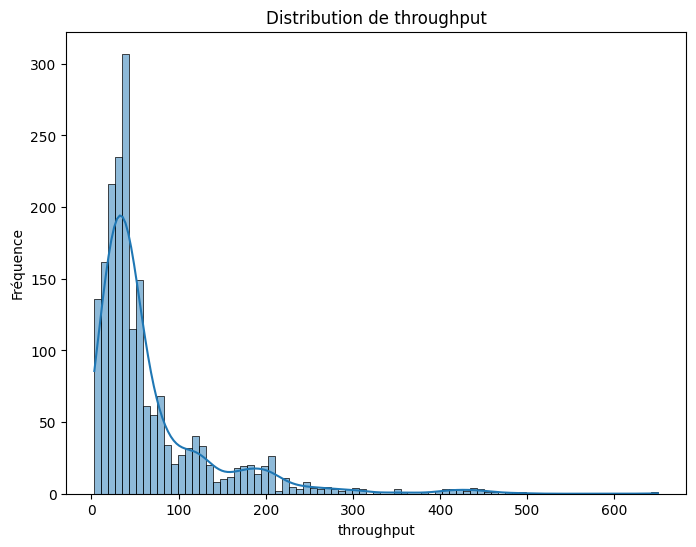

Variable : response_length
Nombre d'apparitions de chaque entité :
response_length
256    1944
Name: count, dtype: int64

Moyenne : 256.0
Médiane : 256.0
Écart-type : 0.0
Minimum : 256
Maximum : 256

Quartiles :
25%    256.0
50%    256.0
75%    256.0
Name: response_length, dtype: float64



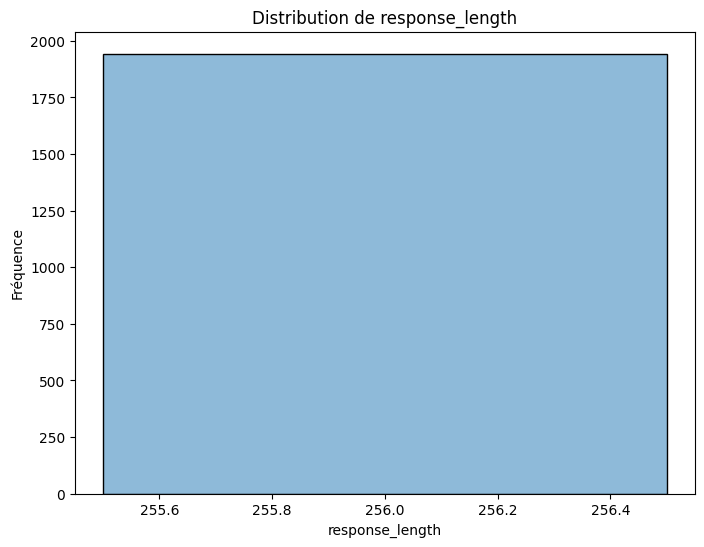

Variable : latency
Nombre d'apparitions de chaque entité :
latency
11.50    13
11.10    11
1.25     10
11.40    10
10.20    10
         ..
9.07      1
13.70     1
9.17      1
5.92      1
7.86      1
Name: count, Length: 891, dtype: int64

Moyenne : 8.39685390946502
Médiane : 6.285
Écart-type : 8.606694836551755
Minimum : 0.394
Maximum : 75.7

Quartiles :
25%    3.330
50%    6.285
75%    9.600
Name: latency, dtype: float64



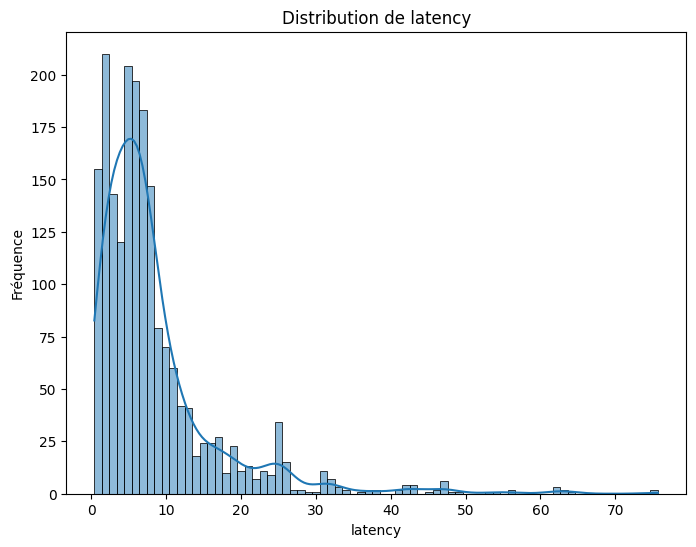

Variable : energy
Nombre d'apparitions de chaque entité :
energy
1852.4160    12
1649.6640    11
1870.8480    11
1050.6240    10
1898.4960    10
             ..
514.2528      1
3529.7280     1
3621.8880     1
771.3792      1
852.4800      1
Name: count, Length: 881, dtype: int64

Moyenne : 2276.5630577777774
Médiane : 1700.3519999999999
Écart-type : 2298.8459763211263
Minimum : 57.23136
Maximum : 20459.52

Quartiles :
25%     836.8128
50%    1700.3520
75%    2803.9680
Name: energy, dtype: float64



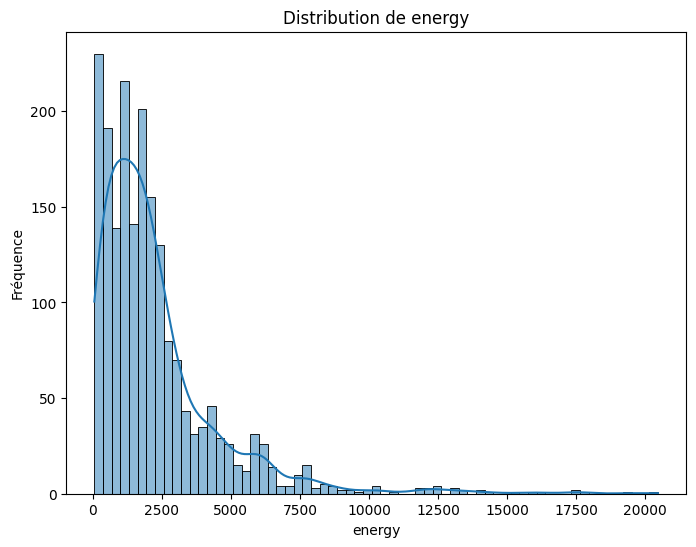

Variable : gpu
Nombre d'apparitions de chaque entité :
gpu
0    1768
1     176
Name: count, dtype: int64

Moyenne : 0.09053497942386832
Médiane : 0.0
Écart-type : 0.28702051122851324
Minimum : 0
Maximum : 1

Quartiles :
25%    0.0
50%    0.0
75%    0.0
Name: gpu, dtype: float64



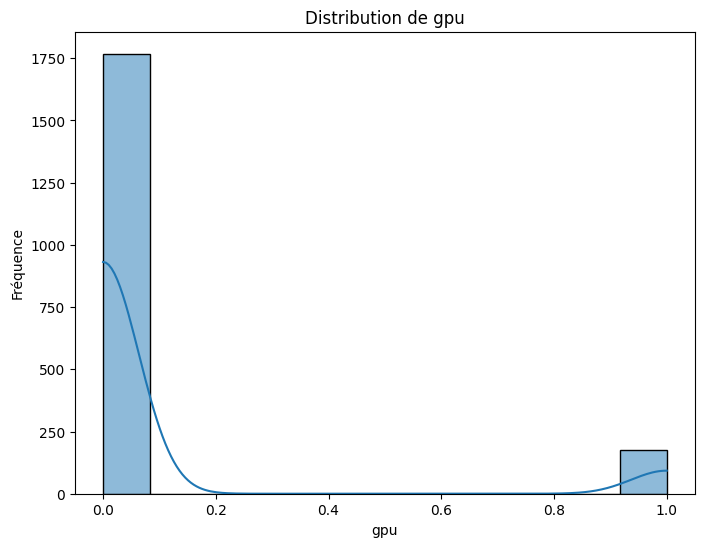

Variable : task
Nombre d'apparitions de chaque entité :
task
0    1944
Name: count, dtype: int64

Moyenne : 0.0
Médiane : 0.0
Écart-type : 0.0
Minimum : 0
Maximum : 0

Quartiles :
25%    0.0
50%    0.0
75%    0.0
Name: task, dtype: float64



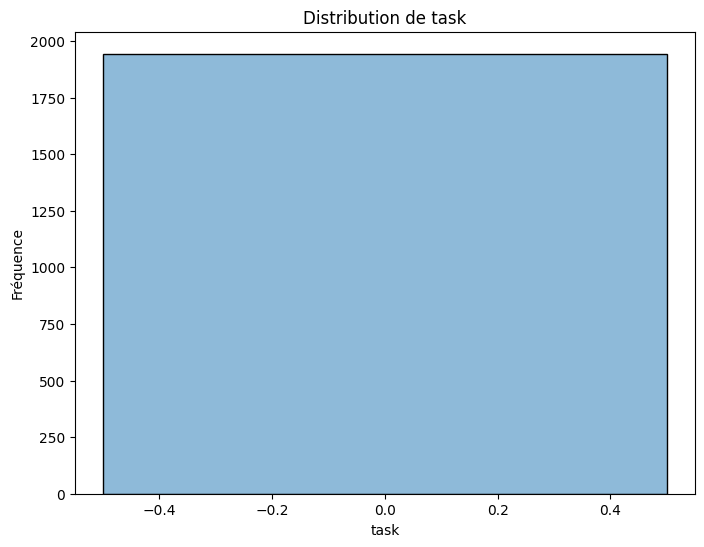

Variable : parameters_count
Nombre d'apparitions de chaque entité :
parameters_count
7.000     347
3.000     122
1.300     101
13.000    100
0.031      96
         ... 
1.610       7
0.430       6
0.169       6
70.000      5
2.780       4
Name: count, Length: 72, dtype: int64

Moyenne : 6.12142232510288
Médiane : 3.0
Écart-type : 9.42814158244052
Minimum : 0.001
Maximum : 70.0

Quartiles :
25%    0.41
50%    3.00
75%    7.00
Name: parameters_count, dtype: float64



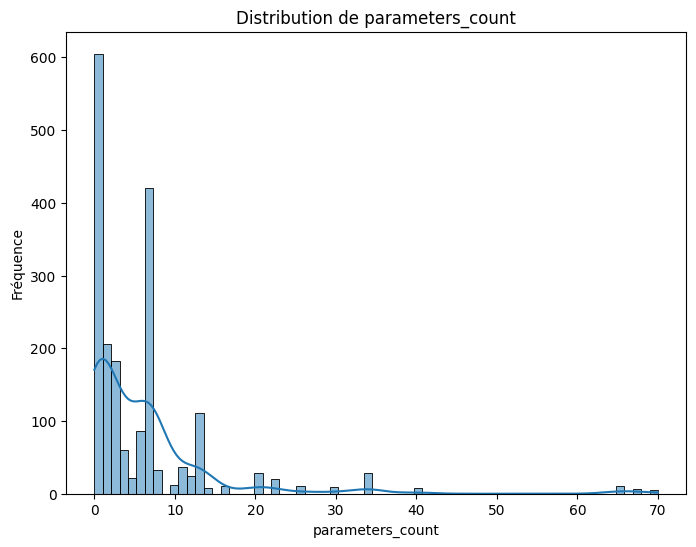

Variable : energy_per_token
Nombre d'apparitions de chaque entité :
energy_per_token
0.002010    12
0.001790    11
0.002030    11
0.001140    10
0.002060    10
            ..
0.000558     1
0.003830     1
0.003930     1
0.000837     1
0.000925     1
Name: count, Length: 881, dtype: int64

Moyenne : 0.002470229012345667
Médiane : 0.001845
Écart-type : 0.0024944075263901105
Minimum : 6.209999999999999e-05
Maximum : 0.0222

Quartiles :
25%    0.000908
50%    0.001845
75%    0.003043
Name: energy_per_token, dtype: float64



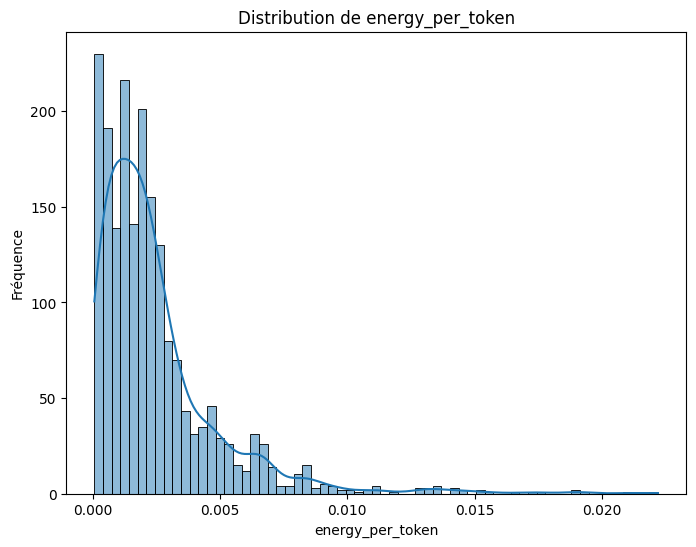

Variable : dtype
Nombre d'apparitions de chaque entité :
dtype
1    1545
2     238
0     161
Name: count, dtype: int64

Moyenne : 1.0396090534979423
Médiane : 1.0
Écart-type : 0.4514231529694509
Minimum : 0
Maximum : 2

Quartiles :
25%    1.0
50%    1.0
75%    1.0
Name: dtype, dtype: float64



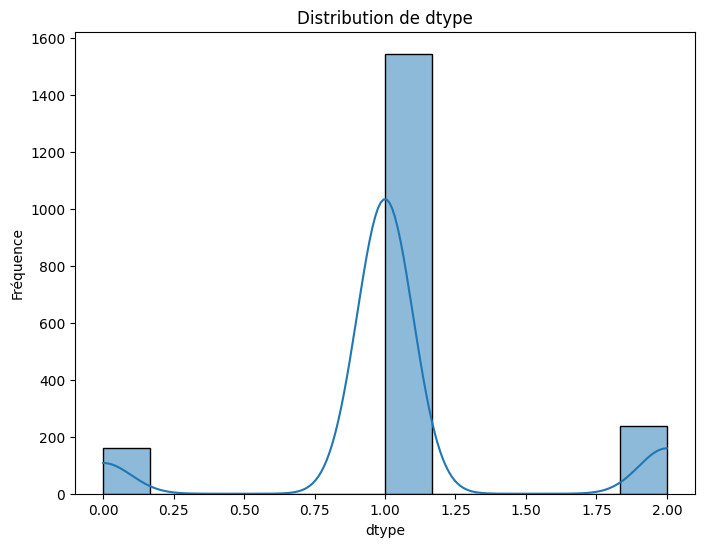

Variable : optimization
Nombre d'apparitions de chaque entité :
optimization
2    1536
0     302
1     106
Name: count, dtype: int64

Moyenne : 1.6347736625514404
Médiane : 2.0
Écart-type : 0.7367597126052211
Minimum : 0
Maximum : 2

Quartiles :
25%    2.0
50%    2.0
75%    2.0
Name: optimization, dtype: float64



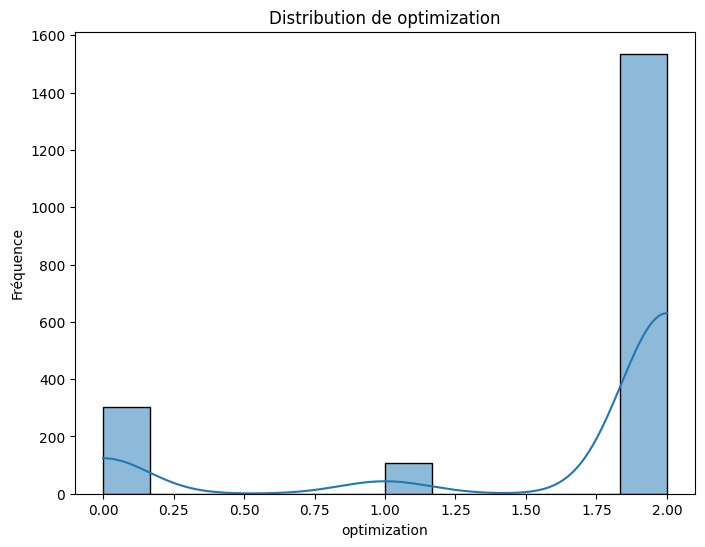

Variable : quantization
Nombre d'apparitions de chaque entité :
quantization
7    764
3    262
2    256
0    153
1    148
5    141
6    119
4    101
Name: count, dtype: int64

Moyenne : 4.43261316872428
Médiane : 5.0
Écart-type : 2.505287493927079
Minimum : 0
Maximum : 7

Quartiles :
25%    2.0
50%    5.0
75%    7.0
Name: quantization, dtype: float64



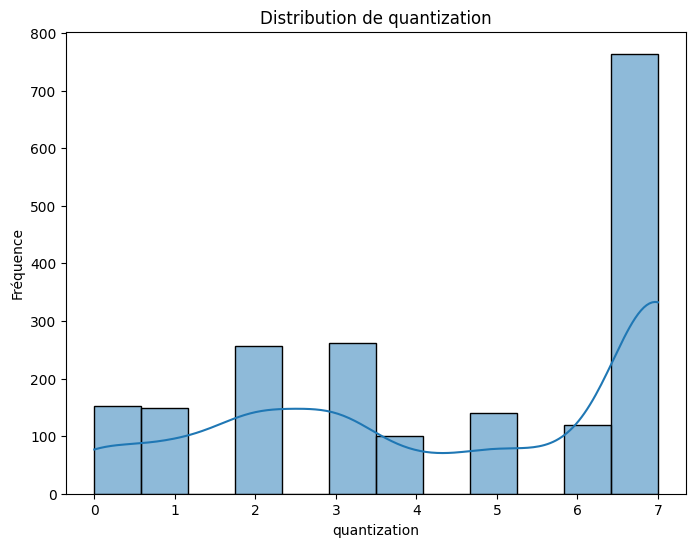

Variable : cuda-fp16
Nombre d'apparitions de chaque entité :
cuda-fp16
0    1843
1     101
Name: count, dtype: int64

Moyenne : 0.051954732510288065
Médiane : 0.0
Écart-type : 0.22199276672880094
Minimum : 0
Maximum : 1

Quartiles :
25%    0.0
50%    0.0
75%    0.0
Name: cuda-fp16, dtype: float64



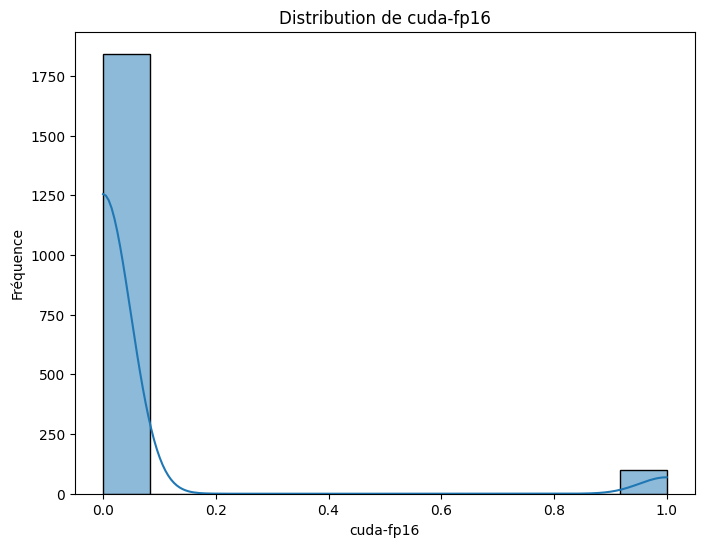

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analyse descriptive univariée
for column in df_encoded.columns:
    if column != 'model':
        print(f"Variable : {column}")
        print(
            f"Nombre d'apparitions de chaque entité :\n{df_encoded[column].value_counts()}\n")
        print(f"Moyenne : {df_encoded[column].mean()}")
        print(f"Médiane : {df_encoded[column].median()}")
        print(f"Écart-type : {df_encoded[column].std()}")
        print(f"Minimum : {df_encoded[column].min()}")
        print(f"Maximum : {df_encoded[column].max()}\n")
        print(
            f"Quartiles :\n{df_encoded[column].describe()[['25%', '50%', '75%']]}\n")

        # Représentation graphique de la distribution
        plt.figure(figsize=(8, 6))
        sns.histplot(df_encoded[column], kde=True)
        plt.title(f"Distribution de {column}")
        plt.xlabel(column)
        plt.ylabel("Fréquence")
        plt.show()

# Matrices de corrélation et graphiques de dispersion pour voir les relations entre les variables.

In [32]:
# Correlation entre parameters_count et energy_per_token

import pandas as pd

variable1 = df_encoded['parameters_count']
variable2 = df_encoded['energy_per_token']
correlation = variable1.corr(variable2)

print("Corrélation entre variable1 et variable2:", correlation)


#Une corrélation de 0.6858815598913961 entre les variables parameters_count et energy_per_token signifie qu'il existe une corrélation positive modérée entre ces deux variables. 


#Une corrélation positive signifie que lorsque la valeur d'une variable augmente, la valeur de l'autre variable a tendance à augmenter également.La magnitude de la corrélation (0.6858815598913961 dans ce cas) indique la force de la relation entre les deux variables. Une valeur proche de 1 indique une forte corrélation, une valeur proche de 0 indique une corrélation faible, et une valeur proche de -1 indique une corrélation négative forte (c'est-à-dire, lorsque la valeur d'une variable augmente, la valeur de l'autre variable a tendance à diminuer).

# Donc, dans ce cas, une corrélation de 0.6858815598913961 suggère qu'il y a une tendance modérée pour que les valeurs de variable1 et variable2 augmentent ensemble, mais ce n'est pas une corrélation parfaite.

Corrélation entre variable1 et variable2: 0.6858815598913961


In [33]:
import pandas as pd

variable1 = df_encoded['energy']
variable2 = df_encoded['parameters_count']
correlation = variable1.corr(variable2)

print("Corrélation entre variable1 et variable2:", correlation)

# Une corrélation de 0.6858815598913964 entre les variables parameters_count et energy signifie qu'il existe une corrélation positive modérée entre ces deux variables.

Corrélation entre variable1 et variable2: 0.6858815598913964


In [34]:
import pandas as pd

variable1 = df_encoded['throughput']
variable2 = df_encoded['parameters_count']
correlation = variable1.corr(variable2)

print("Corrélation entre variable1 et variable2:", correlation)

#Dans ce cas, une corrélation de -0.36470254902049437 suggère qu'il y a une tendance modérée pour que les valeurs de variable1 et variable2 évoluent dans des directions opposées. Cependant, la corrélation n'est pas très forte, ce qui signifie que cette relation négative n'est pas très forte.

Corrélation entre variable1 et variable2: -0.36470254902049437


In [40]:
import pandas as pd

variable1 = df_encoded['throughput']
variable2 = df_encoded['energy']
correlation = variable1.corr(variable2)

print("Corrélation entre variable1 et variable2:", correlation)

# Donc, dans ce cas, une corrélation de -0.5172852585227531 suggère qu'il y a une tendance modérée pour que les valeurs de variable1 et variable2 évoluent dans des directions opposées.

Corrélation entre variable1 et variable2: -0.5172852585227531


In [42]:
import pandas as pd

variable1 = df_encoded['gpu']
variable2 = df_encoded['parameters_count']
correlation = variable1.corr(variable2)

print("Corrélation entre variable1 et variable2:", correlation)

Corrélation entre variable1 et variable2: -0.1311367866285991


In [44]:
import pandas as pd

variable1 = df_encoded['gpu']
variable2 = df_encoded['energy_per_token']
correlation = variable1.corr(variable2)

print("Corrélation entre variable1 et variable2:", correlation)

Corrélation entre variable1 et variable2: -0.231169551132799


In [45]:
import pandas as pd

variable1 = df_encoded['gpu']
variable2 = df_encoded['energy']
correlation = variable1.corr(variable2)

print("Corrélation entre variable1 et variable2:", correlation)  

Corrélation entre variable1 et variable2: -0.2311695511327992


In [46]:
import pandas as pd

variable1 = df_encoded['quantization']
variable2 = df_encoded['energy']
correlation = variable1.corr(variable2)

print("Corrélation entre variable1 et variable2:", correlation)

Corrélation entre variable1 et variable2: -0.24025978249192828


Un graphique de dispersion, c'est pour visualiser la relation entre deux variables continues. Il affiche les valeurs de ces deux variables en utilisant des points dans un plan cartésien, où chaque axe représente l'une des variables.


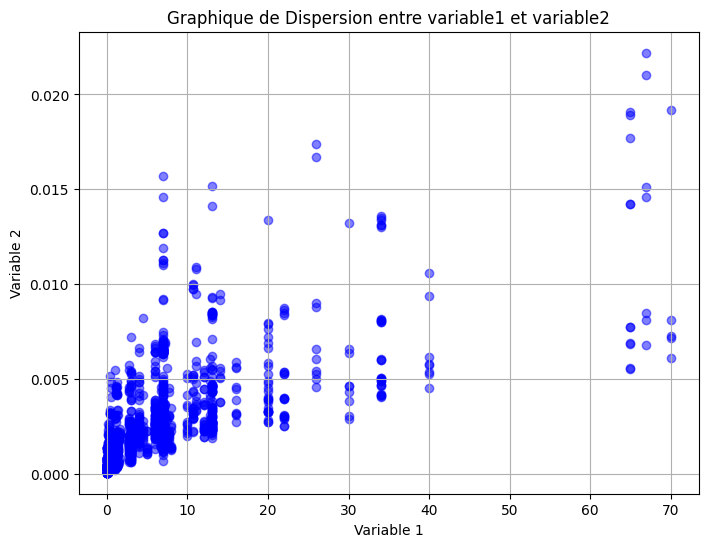

In [48]:
import pandas as pd
import matplotlib.pyplot as plt


variable1 = df_encoded['parameters_count']
variable2 = df_encoded['energy_per_token']

plt.figure(figsize=(8, 6))
plt.scatter(variable1, variable2, color='blue', alpha=0.5)
plt.title('Graphique de Dispersion entre variable1 et variable2')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.grid(True)  
plt.show()

Interpréter et comprendre un graphique de dispersion implique de prendre en compte plusieurs aspects :

Corrélation : L'un des aspects les plus importants à examiner est la relation entre les variables. Si les points semblent suivre une tendance générale, comme une ligne diagonale montante ou descendante, cela suggère une corrélation entre les variables. Par exemple, si les points se déplacent vers le haut de gauche à droite, cela indique une corrélation positive.

Densité des points : Comme vous l'avez mentionné, certaines zones peuvent être plus denses en points que d'autres. Les zones plus denses peuvent indiquer des concentrations de données ou des clusters, ce qui peut suggérer des sous-groupes ou des motifs dans les données.

Outliers : Les points qui se situent loin du regroupement principal peuvent être des valeurs aberrantes (outliers). Ils peuvent indiquer des observations inhabituelles ou des erreurs de mesure.

Distribution des données : L'ensemble du graphique peut donner une idée de la distribution des données. Par exemple, si les points sont uniformément répartis sur toute la plage des valeurs, cela peut indiquer une distribution uniforme. Si les points sont concentrés dans une partie spécifique du graphique, cela peut indiquer une distribution non uniforme ou des données biaisées.

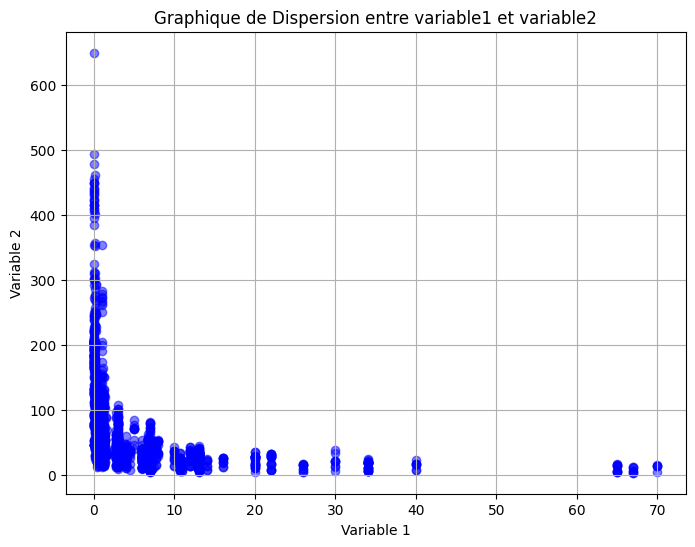

In [50]:
import pandas as pd
import matplotlib.pyplot as plt


variable1 = df_encoded['parameters_count']
variable2 = df_encoded['throughput']

plt.figure(figsize=(8, 6))
plt.scatter(variable1, variable2, color='blue', alpha=0.5)
plt.title('Graphique de Dispersion entre variable1 et variable2')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.grid(True)
plt.show()

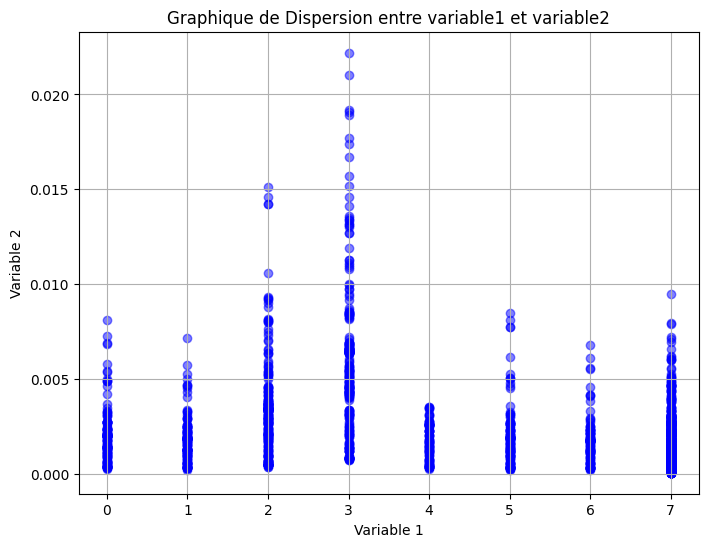

In [51]:
import pandas as pd
import matplotlib.pyplot as plt


variable1 = df_encoded['quantization']
variable2 = df_encoded['energy_per_token']

plt.figure(figsize=(8, 6))
plt.scatter(variable1, variable2, color='blue', alpha=0.5)
plt.title('Graphique de Dispersion entre variable1 et variable2')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.grid(True)
plt.show()

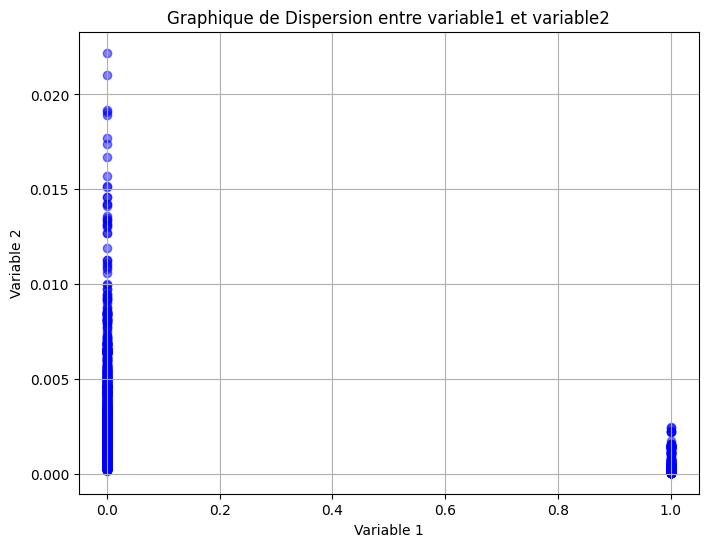

In [52]:
import pandas as pd
import matplotlib.pyplot as plt


variable1 = df_encoded['gpu']
variable2 = df_encoded['energy_per_token']

plt.figure(figsize=(8, 6))
plt.scatter(variable1, variable2, color='blue', alpha=0.5)
plt.title('Graphique de Dispersion entre variable1 et variable2')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.grid(True)
plt.show()

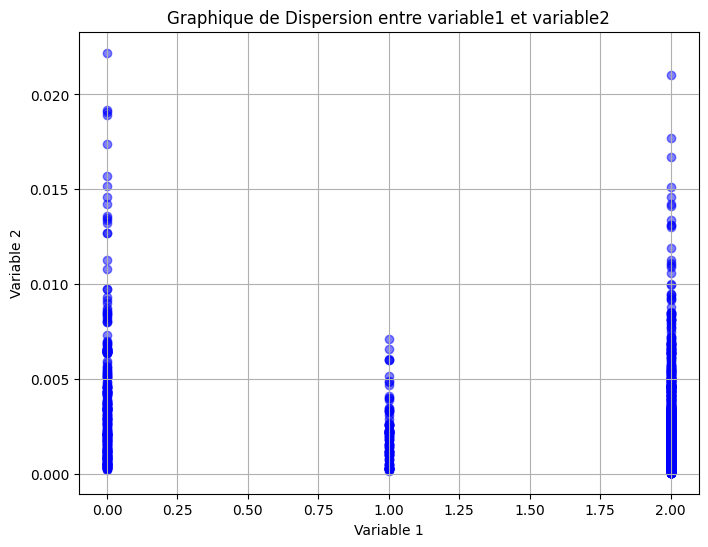

In [53]:
import pandas as pd
import matplotlib.pyplot as plt


variable1 = df_encoded['optimization']
variable2 = df_encoded['energy_per_token']

plt.figure(figsize=(8, 6))
plt.scatter(variable1, variable2, color='blue', alpha=0.5)
plt.title('Graphique de Dispersion entre variable1 et variable2')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.grid(True)
plt.show()  

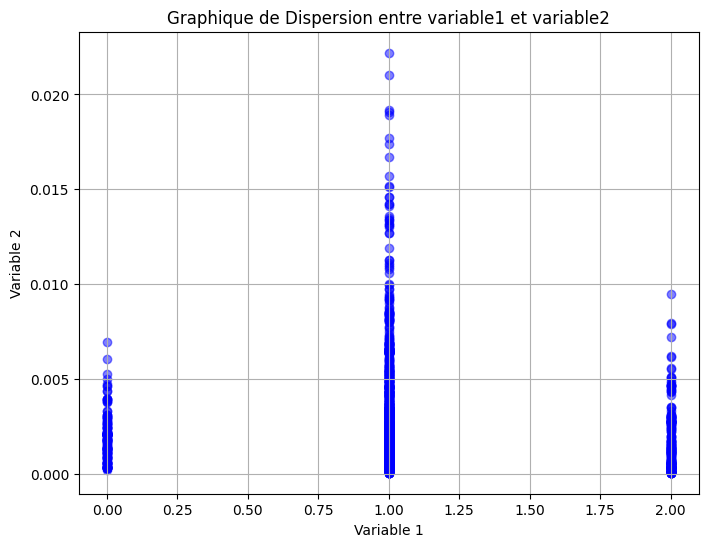

In [56]:
import pandas as pd
import matplotlib.pyplot as plt


variable2 = df_encoded['energy_per_token']
variable1 = df_encoded['dtype']

plt.figure(figsize=(8, 6))
plt.scatter(variable1, variable2, color='blue', alpha=0.5)
plt.title('Graphique de Dispersion entre variable1 et variable2')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.grid(True)
plt.show()

# Analyse en composantes principales (ACP) pour identifier les principales dimensions et résumer l'information.

Charges des variables sur chaque composante principale :
      throughput  response_length       latency    energy           gpu  \
0  -3.285477e-01     3.330669e-16  4.635350e-01  0.474478 -1.961836e-01   
1   2.812385e-01     1.110223e-16  1.550001e-01  0.178223  5.926155e-01   
2  -6.955876e-02     4.683753e-17  1.493701e-02  0.041640  7.071838e-02   
3  -2.955286e-02    -1.370432e-16 -4.457037e-02  0.006382 -8.955059e-03   
4   8.252059e-02    -1.439820e-16  7.956035e-02  0.073700  5.106902e-02   
5   5.188250e-01     2.775558e-17  1.093213e-01  0.046089  4.444652e-01   
6   6.165042e-01     1.665335e-16 -1.312814e-01 -0.016038 -5.630942e-01   
7   3.885937e-01     1.665335e-16  3.510416e-01  0.213486 -2.948320e-01   
8   1.334432e-02    -7.754214e-16 -7.746965e-01  0.433524  3.285288e-02   
9  -1.429850e-16     1.312065e-04 -4.783364e-17  0.707107  2.935274e-16   
10  1.593565e-16    -9.078891e-01  8.326673e-16 -0.000034 -1.665335e-16   
11  8.297603e-17    -4.192103e-01 -2.220446

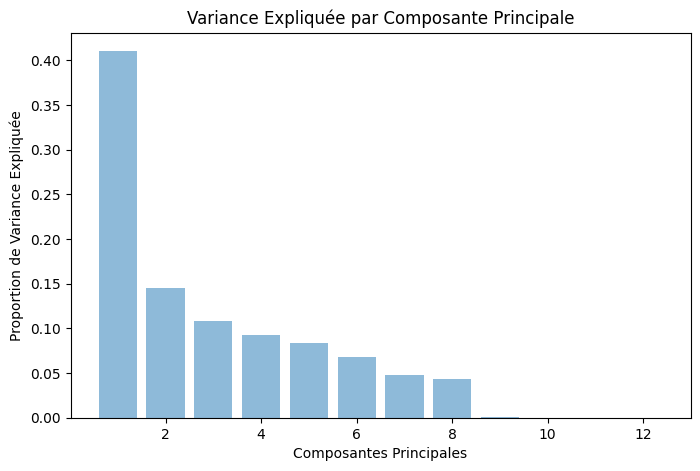

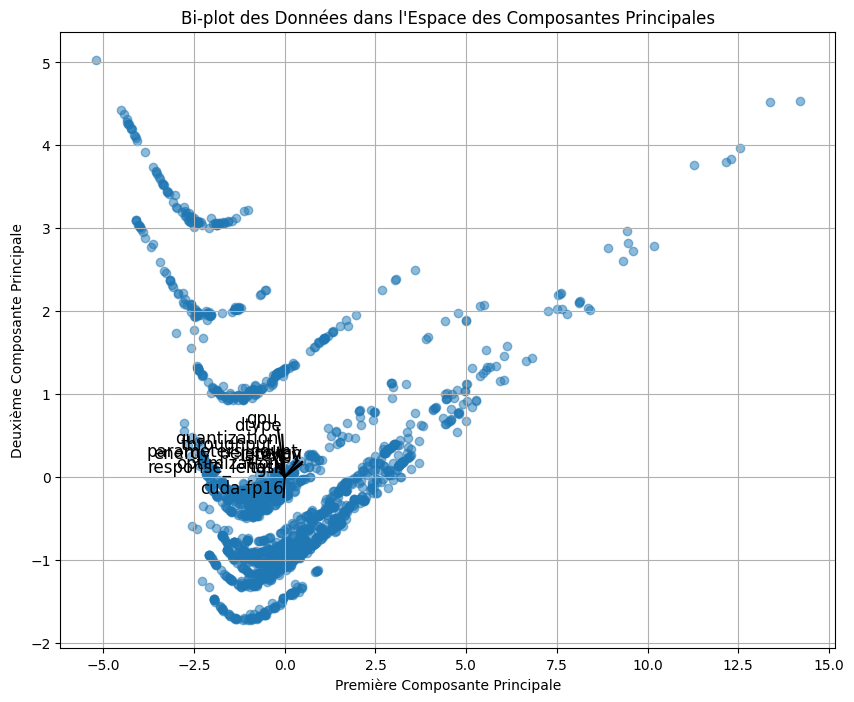

In [58]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X = df_encoded.iloc[:, 1:]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()

pca.fit(X_scaled)

PC = pca.transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_

components_df = pd.DataFrame(pca.components_, columns=X.columns)
print("Charges des variables sur chaque composante principale :")
print(components_df)

plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1),
        explained_variance_ratio, alpha=0.5, align='center')
plt.ylabel('Proportion de Variance Expliquée')
plt.xlabel('Composantes Principales')
plt.title('Variance Expliquée par Composante Principale')
plt.show()

plt.figure(figsize=(10, 8))
for i, (x, y) in enumerate(zip(pca.components_[0, :], pca.components_[1, :])):
    plt.plot([0, x], [0, y], color='k')
    plt.text(x, y, X.columns[i], fontsize='12', ha='right', va='bottom')
plt.scatter(PC[:, 0], PC[:, 1], alpha=0.5)
plt.xlabel('Première Composante Principale')
plt.ylabel('Deuxième Composante Principale')
plt.title('Bi-plot des Données dans l\'Espace des Composantes Principales')
plt.grid(True)
plt.show()

Pour interpréter les résultats de cette Analyse en Composantes Principales (ACP), examinons les charges des variables sur chaque composante principale. Les charges des variables représentent les poids ou les contributions de chaque variable à chaque composante principale. Voici une explication détaillée et des déductions basées sur vos résultats :

Composante Principale 1 (PC1) :

Les variables ayant des charges élevées sur PC1 sont : 'latency', 'energy', 'gpu', 'task', 'parameters_count', et 'energy_per_token'.
Cette composante principale semble être principalement associée aux aspects de performance (latence, énergie, utilisation du GPU), ainsi qu'aux caractéristiques de la tâche (type de tâche, nombre de paramètres, énergie par token).
Composante Principale 2 (PC2) :

Les variables ayant des charges élevées sur PC2 sont : 'throughput', 'latency', 'energy', 'gpu', 'task', 'optimization', 'quantization', et 'cuda-fp16'.
PC2 semble être associé à des aspects de performance similaires à PC1 (latence, énergie, utilisation du GPU) ainsi qu'aux options d'optimisation et de quantification.
Composante Principale 3 (PC3) :

Les variables ayant des charges élevées sur PC3 sont : 'throughput', 'latency', 'energy', 'gpu', 'task', 'dtype', 'optimization', 'quantization', et 'cuda-fp16'.
PC3 semble également être associé à des aspects de performance et de tâche similaires à PC1 et PC2, mais avec une contribution plus importante des types de données (dtype).
Analyse des déductions :

Les charges élevées sur plusieurs composantes principales indiquent que ces variables sont importantes pour expliquer la variance des données dans ces dimensions.
Les variables 'latency', 'energy', 'gpu', 'task' semblent avoir des impacts significatifs sur plusieurs composantes principales, ce qui suggère qu'elles sont des facteurs importants dans l'ensemble de données.
Les variables 'optimization' et 'quantization' semblent également jouer un rôle important dans la performance et l'optimisation des modèles.


# Classification non supervisée (comme k-means) pour détecter des groupes d'observations similaires.

Identifie le bon nombre de clusters (K) en utilisant la méthode du coude.

Applique l'algorithme K-means avec le bon K.


Visualise les clusters.

/home/lenovo/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/lenovo/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/lenovo/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/lenovo/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/lenovo/.local/lib/python3.

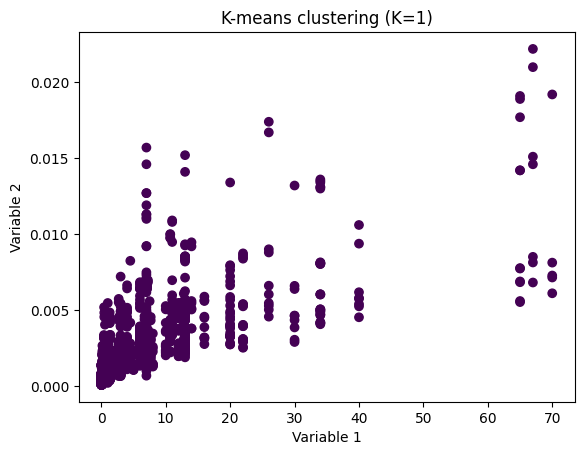

In [64]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


def kmeans_clustering(X1, X2, k_values):
    X_pair = np.column_stack((X1, X2))

    inertias = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X_pair)
        inertias.append(kmeans.inertia_)

    optimal_k = elbow_method(k_values, inertias)

    # Application de K-means avec le bon K
    kmeans = KMeans(n_clusters=optimal_k)
    kmeans.fit(X_pair)
    labels = kmeans.labels_

    plt.scatter(X1, X2, c=labels, cmap='viridis')
    plt.xlabel('Variable 1')
    plt.ylabel('Variable 2')
    plt.title(f'K-means clustering (K={optimal_k})')
    plt.show()


def elbow_method(k_values, inertias):
    slopes = [inertias[i] - inertias[i+1] for i in range(len(inertias)-1)]

    optimal_k_index = slopes.index(max(slopes))
    optimal_k = k_values[optimal_k_index]

    return optimal_k


X1 = df_encoded['parameters_count'].values
X2 = df_encoded['energy_per_token'].values
k_values = range(1, 11)

# Appel de la fonction
kmeans_clustering(X1, X2, k_values)

/home/lenovo/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/lenovo/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/lenovo/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/lenovo/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/lenovo/.local/lib/python3.

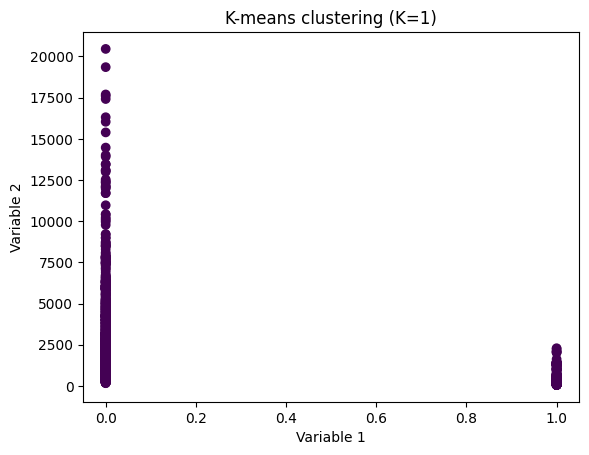

In [66]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


def kmeans_clustering(X1, X2, k_values):
    X_pair = np.column_stack((X1, X2))

    inertias = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X_pair)
        inertias.append(kmeans.inertia_)

    optimal_k = elbow_method(k_values, inertias)

    # Application de K-means avec le bon K
    kmeans = KMeans(n_clusters=optimal_k)
    kmeans.fit(X_pair)
    labels = kmeans.labels_

    plt.scatter(X1, X2, c=labels, cmap='viridis')
    plt.xlabel('Variable 1')
    plt.ylabel('Variable 2')
    plt.title(f'K-means clustering (K={optimal_k})')
    plt.show()


def elbow_method(k_values, inertias):
    slopes = [inertias[i] - inertias[i+1] for i in range(len(inertias)-1)]

    optimal_k_index = slopes.index(max(slopes))
    optimal_k = k_values[optimal_k_index]

    return optimal_k


X1 = df_encoded['gpu'].values
X2 = df_encoded['energy'].values
k_values = range(1, 11)

kmeans_clustering(X1, X2, k_values)